In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from typing import List
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ndcg_score
import matplotlib.pyplot as plt

In [75]:
import sklearn
sklearn.__version__

'0.23.1'

In [76]:
DATA_PATH = 'shopping_mall.csv'


In [77]:
df = pd.read_csv(DATA_PATH)
x = df[['latitude', 'Longitude']]
y = df['rating']
df.head()

,Unnamed: 0,place_name,place_ID,latitude,Longitude,plus_code,rating,user_ratings_total,business_status,types,address,region,population,num_bus_stop,competition
0,0,NTU North Spine Plaza,ChIJ-f-vxgoP2jERP42l8kUV8DE,1.347064,103.680822,8MWJ+R8 Singapore,4.3,1070,OPERATIONAL,shopping_mall,"76 Nanyang Dr, Singapore 637331",Western Water Catchment,NaN,18,0
1,1,Orchard Towers,ChIJ-z0z0IwZ2jERXjOtNGbV0-0,1.307229,103.829332,8R4H+VP Singapore,3.9,2292,OPERATIONAL,shopping_mall,"400 Orchard Rd, Singapore 238875",Orchard,920.0,7,13
2,2,Quayside Isle,ChIJ01fgzLUe2jERxlhvImcbZ7g,1.247681,103.842072,6RXR+3R Singapore,4.3,568,OPERATIONAL,shopping_mall,"31 Ocean Way, Singapore 098375",Southern Islands,1480.0,1,0
3,3,Coronation Shopping Plaza,ChIJ08duKAYa2jER47-5U4ZdgAo,1.323919,103.809989,8RF5+HX Singapore,3.6,202,OPERATIONAL,shopping_mall,"587 Bukit Timah Rd, Singapore 269707",Bukit Timah,74470.0,7,4
4,4,Hougang 1,ChIJ0ZkQLVsW2jERY9DgZurtpl8,1.376061,103.879155,9VGH+CM Singapore,3.9,2183,OPERATIONAL,shopping_mall,"1 Hougang Street 91, Singapore 538692",Hougang,222310.0,0,0


In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
model = LinearRegression()
model.fit(x_train, y_train)
print('[INFO] Model trained.')

y_pred = model.predict(x_test.values)
y_true = y_test.values
mean_squared_error(y_true, y_pred)


[INFO] Model trained.


0.0750827159141192

In [79]:
ndcg_5 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=5)
ndcg_10 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=10)
ndcg_20 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=20)
print('NDCG@5 = {}'.format(ndcg_5))
print('NDCG@10 = {}'.format(ndcg_10))
print('NDCG@20 = {}'.format(ndcg_20))

NDCG@5 = 0.9391384659240228
NDCG@10 = 0.9327196484977376
NDCG@20 = 0.9234933142927445


In [50]:
r2_score(y_true, y_pred)

-0.03669197595327378

In [51]:
print(y_pred)

[3.98441553 4.03218962 3.98682602 3.99906733 3.98810677 3.96238291
 3.98880376 3.99563387 4.00518987 3.98815087 4.06428132 3.98689794
 4.00421839 4.06441814 3.98872067 3.98512642 3.98392303 3.98844543
 4.01786151 4.00903165 4.05503192 3.97443861 3.98979665 3.98552562
 3.96411776 3.98769904 3.98248538 3.99292478 3.98415005 3.98604302
 3.96270915 3.98889085 3.98894482 3.99563387 3.97410511 4.03459938
 4.03367239 4.00635924 4.03640218 3.99512523 3.97410095 3.98276141
 3.99500423 3.98864331 3.98811521 3.91495775 4.05243094 3.99352563
 4.01767753 4.00245142 4.01398851 3.97905087 4.05078696 3.87612038
 4.01655324 3.98912458 3.98898096 4.0169777  4.02387622 3.98650026
 4.027211   4.0009194  3.99768109 4.05229344 3.97436716 3.99023501
 4.01852579]


In [52]:
print(y_true)

[4.  3.5 4.1 4.  4.2 4.1 3.9 3.7 3.9 4.2 4.3 3.7 3.9 4.1 4.  3.7 4.1 3.9
 4.  4.2 4.1 3.9 4.  4.4 4.1 4.2 4.1 3.8 4.1 4.1 3.4 4.  4.2 3.9 4.2 3.9
 3.8 4.1 4.3 4.4 3.5 3.8 4.2 4.6 4.3 4.1 4.3 4.3 4.2 3.7 4.2 4.  4.1 4.3
 3.4 3.8 4.5 4.3 3.1 4.  4.1 4.2 4.1 3.8 3.9 4.4 4.2]


# Normalising Data

In [53]:
weight = df['user_ratings_total']
scaler = MinMaxScaler()
x_normalised = scaler.fit(x)
x_normalised = scaler.transform(x)
x_normalised
y = np.array(y)
y = y.reshape(-1,1)
y_normalised = scaler.fit(y)
y_normalised = scaler.transform(y)


In [54]:
x_norm_train, x_norm_test, y_norm_train, y_norm_test = train_test_split(x_normalised,y_normalised, test_size=0.2)
model.fit(x_norm_train, y_norm_train)
y_norm_pred = model.predict(x_norm_test)
mean_squared_error(y_norm_test, y_norm_pred)

0.014692007117514623

In [55]:
r2_score(y_norm_test, y_norm_pred)

-0.013550073750666414

# Linear Regression with weight 

In [56]:
weight = df['user_ratings_total']

In [57]:
x_norm_train, x_norm_test, y_norm_train, y_norm_test, weight_train, weight_test = train_test_split(x_normalised,y_normalised, weight, test_size=0.2)
model.fit(x_norm_train, y_norm_train, weight_train)
y_norm_pred_weight = model.predict(x_norm_test)
mean_squared_error(y_norm_test, y_norm_pred_weight, weight_test)

C:\Users\MEHAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass sample_weight=8       4438
108     1396
80        10
131      189
59       271
35     12639
74        25
226      459
110        8
200    14778
222    15855
324     5311
183       11
9       1285
40      5456
247       28
50      9876
216      304
42     10564
258     1045
215      687
112     1901
170       83
303      989
202        7
165       18
121       87
150     3797
198      868
72      4274
       ...  
269      585
272       17
49       544
88       124
186       13
288     6969
95       219
19        27
70      1286
212      778
208       30
106        9
4       2183
169      731
75      1176
146     4816
143     1417
233     2010
0       1070
320     3393
31       586
275     1263
291      275
29      5243
166      318
189     3774
182       81
278     2626
237     6285
148    10669
Name: user_ratings_total, Length: 67, dtype: int64 as keyword args. From version 0.25 passing thes

0.004674840537072383

In [58]:
r2_score(y_norm_test, y_norm_pred_weight, weight_test)

C:\Users\MEHAL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass sample_weight=8       4438
108     1396
80        10
131      189
59       271
35     12639
74        25
226      459
110        8
200    14778
222    15855
324     5311
183       11
9       1285
40      5456
247       28
50      9876
216      304
42     10564
258     1045
215      687
112     1901
170       83
303      989
202        7
165       18
121       87
150     3797
198      868
72      4274
       ...  
269      585
272       17
49       544
88       124
186       13
288     6969
95       219
19        27
70      1286
212      778
208       30
106        9
4       2183
169      731
75      1176
146     4816
143     1417
233     2010
0       1070
320     3393
31       586
275     1263
291      275
29      5243
166      318
189     3774
182       81
278     2626
237     6285
148    10669
Name: user_ratings_total, Length: 67, dtype: int64 as keyword args. From version 0.25 passing thes

-0.347408550844722

# Adding relevance to find DCG score

In [69]:
df['relevance']=0

In [70]:
def compute_relevance(dataframe):
    for i in range(len(dataframe)):
        if dataframe['user_ratings_total'][i] <= 50:
            if 0 <= dataframe['rating'][i] <= 3.5:
                dataframe['relevance'][i] = 0
            elif 3.5 <= dataframe['rating'][i] <= 4.5:
                dataframe['relevance'][i] = 1
            else:
                dataframe['relevance'][i] = 2
        else:
            if 0 <= dataframe['rating'][i] <= 2:
                dataframe['relevance'][i] = 0
            elif 2 <= dataframe['rating'][i] <= 4:
                dataframe['relevance'][i] = 1
            else:
                dataframe['relevance'][i] = 2

In [71]:
compute_relevance(df)

C:\Users\MEHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\MEHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\MEHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\MEHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tryi

In [72]:
df.to_csv('new_dataset.csv')

In [73]:
y = df['relevance']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test.values)
ndcg_5 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=5)
ndcg_10 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=10)
ndcg_20 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=20)
print('NDCG@5 = {}'.format(ndcg_5))
print('NDCG@10 = {}'.format(ndcg_10))
print('NDCG@20 = {}'.format(ndcg_20))

NDCG@5 = 0.7765732350040717
NDCG@10 = 0.7840017888310805
NDCG@20 = 0.7516162044215875


In [64]:
show = pd.DataFrame({'True Relevance': y_test, 'Predicted Score': y_pred}).sort_values(by='Predicted Score', ascending=False)
show.reset_index(drop = True, inplace=True)
pd.set_option('display.max_rows', len(y_test))
show

,True Relevance,Predicted Score
0,2,1.481868
1,1,1.447191
2,2,1.446279
3,2,1.443331
4,2,1.438122
5,2,1.433510
6,2,1.426550
7,2,1.398472
8,1,1.397340
9,2,1.385691


0.0
5.0


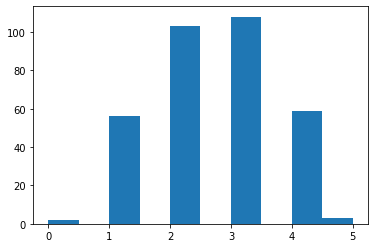

In [65]:
rating = df['rating']
users = df['user_ratings_total']
relevance = round(np.ceil(np.log(users)*rating)/10)
print(min(relevance))
print(max(relevance))
plt.hist(relevance)
df['relevance'] = relevance

In [66]:
y = df['relevance']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test.values)
ndcg_5 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=5)
ndcg_10 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=10)
ndcg_20 = ndcg_score(np.array([y_test]), np.array([y_pred]), k=20)
print('NDCG@5 = {}'.format(ndcg_5))
print('NDCG@10 = {}'.format(ndcg_10))
print('NDCG@20 = {}'.format(ndcg_20))

NDCG@5 = 0.7385380593876881
NDCG@10 = 0.7748116129263518
NDCG@20 = 0.7189950666806815


In [67]:
show = pd.DataFrame({'True Relevance': y_test, 'Predicted Score': y_pred}).sort_values(by='True Relevance', ascending=False)
show.reset_index(drop = True, inplace=True)
pd.set_option('display.max_rows', len(y_test))
show

,True Relevance,Predicted Score
0,5.0,2.729246
1,5.0,2.414245
2,4.0,2.359106
3,4.0,2.455810
4,4.0,2.303815
5,4.0,2.447140
6,4.0,2.308099
7,4.0,2.487581
8,4.0,2.483095
9,4.0,2.566370
